# Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import math 

import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [3]:
path = "data.xls"
df = pd.read_excel(path)

In [4]:
df.shape

(30001, 24)

In [5]:
df.columns.values

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'], dtype=object)

In [6]:
# Mettre la première ligne en nom des colonnes
df.columns = df.iloc[0]

# et effacer celle-ci
df.drop("ID", inplace=True)

In [7]:
df.sample(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
11602,150000,2,3,1,35,0,0,0,0,0,...,98925,100017,99607,10000,4275,3550,3750,3600,3100,1
18083,140000,1,1,1,36,0,0,0,0,0,...,42977,43960,45093,2200,2001,2100,2000,2000,2000,0
11745,220000,1,1,2,51,-1,-1,-1,-1,-1,...,-105,20895,20835,0,54165,0,21000,20940,33460,1
11293,140000,2,2,1,37,1,-1,-1,0,0,...,1460,0,0,177,1460,0,0,0,0,1
27756,50000,2,2,2,22,0,0,0,0,-2,...,0,0,0,2100,1800,0,0,0,0,0


# Visualisation des données

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AMT6                     30000 non-null object
PAY_AMT1    

In [9]:
# Pas de valeurs manquantes
# Renommer la target
df = df.rename(columns={'default payment next month': 'target'})

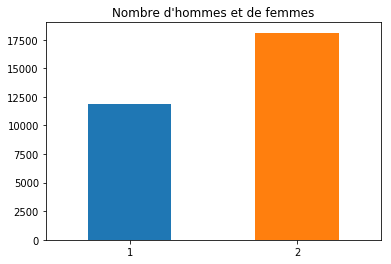

In [11]:
df.SEX.value_counts().sort_index().plot(kind='bar', title="Nombre d'hommes et de femmes", rot=1)

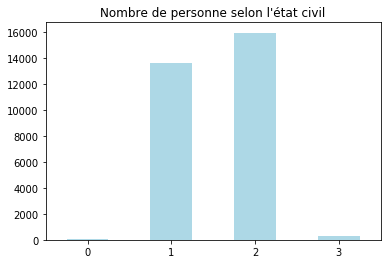

In [12]:
df.MARRIAGE.value_counts().sort_index().plot(kind = 'bar', color="lightBlue", title="Nombre de personne selon l'état civil", rot=1)

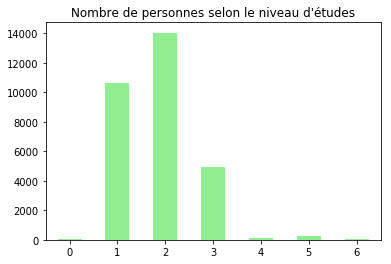

In [13]:
df.EDUCATION.value_counts().sort_index().plot(kind='bar',rot=1, color="lightGreen", title="Nombre de personnes selon le niveau d'études")

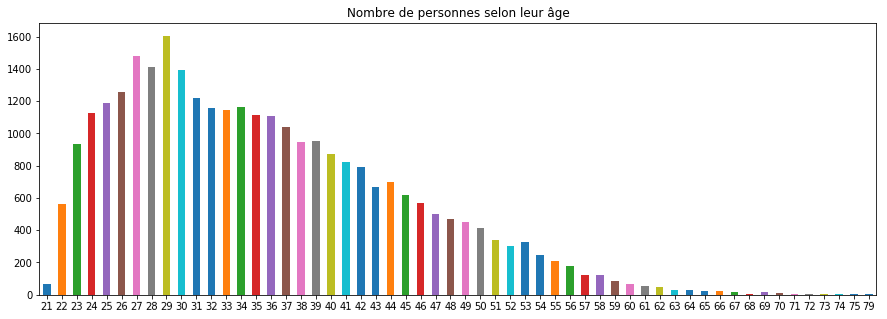

In [17]:
df.AGE.value_counts().sort_index().plot(kind="bar", title="Nombre de personnes selon leur âge", figsize=[15,5], rot=1)

In [18]:
df.AGE.value_counts().index.sort_values()

Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
            72, 73, 74, 75, 79],
           dtype='int64')

In [19]:
# Nouvelle colonne pour avoir une tranche d'âge car illisible sinon 
def age_range(x):
    return math.trunc(x/10)*10
df["age_range"] = df.AGE.map(age_range)

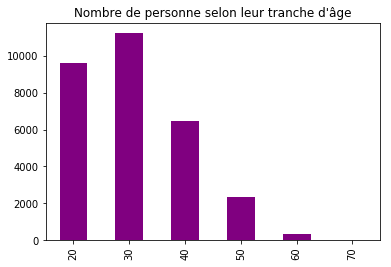

In [20]:
df.age_range.value_counts().sort_index().plot(kind='bar', color="purple", title = "Nombre de personne selon leur tranche d'âge")

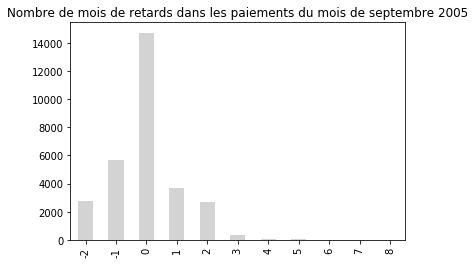

In [21]:
df.PAY_0.value_counts().sort_index().plot(kind="bar", color="lightgray", title="Nombre de mois de retards dans les paiements du mois de septembre 2005")

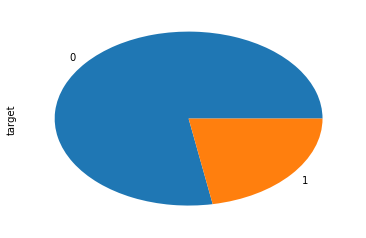

In [22]:
df["target"].value_counts().plot(kind="pie")

In [23]:
target_by_sex = pd.crosstab(df.SEX, df.target)
target_by_sex

target,0,1
SEX,,
1,9015,2873
2,14349,3763


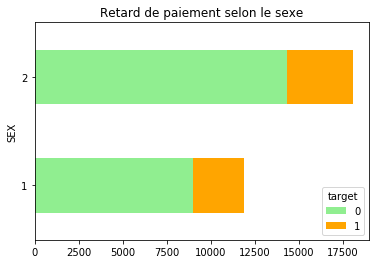

In [24]:
target_by_sex.plot(kind='barh', stacked = True, color=["lightgreen","orange"], title="Retard de paiement selon le sexe")

In [25]:
target_by_situation = pd.crosstab(df.MARRIAGE, df.target)
target_by_situation

target,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


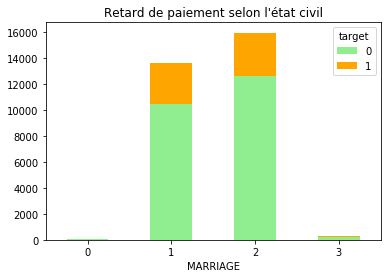

In [29]:
target_by_situation.plot(kind='bar',rot=1, stacked = True, color=["lightgreen","orange"], title="Retard de paiement selon l'état civil")

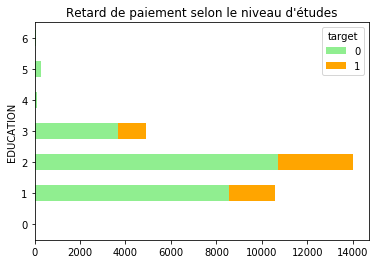

In [27]:
target_by_education = pd.crosstab(df.EDUCATION, df.target)
target_by_education.plot(kind='barh', stacked = True, color=["lightgreen","orange"], title="Retard de paiement selon le niveau d'études")


# Cleaning Data

In [30]:
# Renommer certaines colonnes 
df = df.rename(columns={'PAY_0': 'Sept_Pay', 
                        'PAY_2': 'Aug_Pay', 
                        'PAY_3': 'July_Pay', 
                        'PAY_4': 'June_Pay', 
                        'PAY_5': 'May_Pay', 
                        'PAY_6': 'Apr_Pay', 
                        
                        'BILL_AMT1': 'Sept_Bill', 
                        'BILL_AMT2': 'Aug_Bill', 
                        'BILL_AMT3': 'July_Bill', 
                        'BILL_AMT4': 'June_Bill', 
                        'BILL_AMT5': 'May_Bill', 
                        'BILL_AMT6': 'Apr_Bill', 
                        
                        'PAY_AMT1': 'Sept_Previous_Payment', 
                        'PAY_AMT2': 'Aug_Previous_Payment', 
                        'PAY_AMT3': 'July_Previous_Payment', 
                        'PAY_AMT4': 'June_Previous_Payment', 
                        'PAY_AMT5': 'May_Previous_Payment', 
                        'PAY_AMT6': 'Apr_Previous_Payment',})

In [31]:
# Pas de correspondance pour les niveaux d'études 0,5 et 6 donc on les rassemble dans 4="others" 
condition = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[condition, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [32]:
# Pareil pour marriage :
condition = (df.MARRIAGE == 0)
df.loc[condition, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [33]:
# Remplacer les -2 et 0 qui ne sont pas documentés => remplacés par -1=paiement sans retard
columnList = ["Sept_Pay", "Aug_Pay", "July_Pay", "June_Pay", "May_Pay", "Apr_Pay"]
for x in columnList:
    condition = (df[x] == -2) | (df[x] == 0)
    df.loc[condition, x] = -1

# Feature Engineering

In [34]:
df['SEX_MAR'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SEX_MAR'] = 1 #homme marrié
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SEX_MAR'] = 2 #homme célibataire
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SEX_MAR'] = 3 #homme "autre"
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SEX_MAR'] = 4 #femme mariée
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SEX_MAR'] = 5 #femme célibataire
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SEX_MAR'] = 6 #femme "autre"

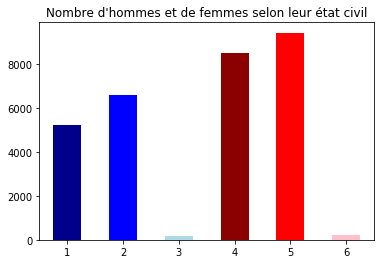

In [36]:
df.SEX_MAR.value_counts().sort_index().plot(kind="bar", rot=1, color=["darkblue","blue","lightblue","darkred","red","pink"], title="Nombre d'hommes et de femmes selon leur état civil")

# Model

In [37]:
# Avoir une idée naïve d'une prédiction
df.target.sum() / len(df.target)

0.2212

### Imports

In [ ]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
!pip3 install catboost
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

### Jeux de train & test

In [ ]:
columns = df.columns.drop('target')
X = df[columns]
y = df["target"].astype("int") #erreur si type="object"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

accuracy_score(y_true = y_test, y_pred = predictions) 

In [ ]:
roc_auc_score(y_test, predictions) #Plus adapté

### GridSearch with DecisionTreeClassifier

In [ ]:
#Prend trop de temps ... 
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_) # on print le meilleur estimateur pour le réutiliser après
print(np.abs(grid_tree.best_score_))

In [ ]:
# Résultats du GridSearch
classifier = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
roc_auc_score(y_test, predictions)

In [ ]:
tab = pd.DataFrame(index=columns)
tab["importance"]= classifier.feature_importances_
tab

In [ ]:
tab.sort_values(by="importance", ascending=False).plot(kind="bar", color="purple")

### RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_jobs=4, 
                             random_state=1000,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
classifier.fit(X_train, y_train)

In [ ]:
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
roc_auc_score(y_test, predictions)

### CatBoostClassifier

In [ ]:
# Prend beaucoup de temps  
classifier = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             od_wait=100)
classifier.fit(X_train, y_train,verbose=True)
predictions = classifier.predict(X_test)

accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
roc_auc_score(y_test, predictions)

### XGBoost

In [ ]:
#Pour xgboost et lightgbm
for col in columns:
    X_train[col] = X_train[col].astype(float)
    y_train = y_train.astype(float)
    X_test[col] = X_test[col].astype(float)
    y_test = y_test.astype(float)

In [ ]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'

model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

### LightGBM

In [ ]:
params = {
          "objective" : "regression",
            "metric" : "auc", 
            "num_leaves" : 30,
            "learning_rate" : 0.1
         }

In [ ]:
dtrain = lgb.Dataset(X_train, 
                     label=y_train)

dtest = lgb.Dataset(X_test,
                     label=y_test)

In [ ]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain,dtest], 
                  valid_names=['train','test'], 
                  early_stopping_rounds=100,
                  verbose_eval=50, 
                  feval=None)

# Results

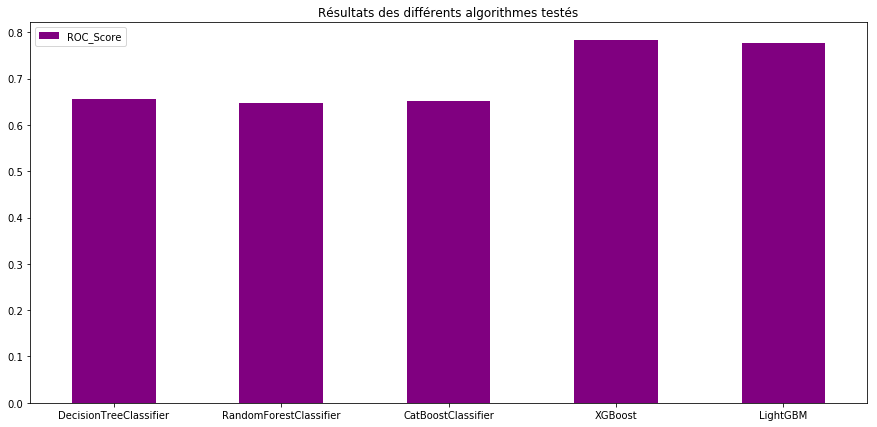

In [39]:
results = pd.DataFrame(index=["DecisionTreeClassifier", "RandomForestClassifier", "CatBoostClassifier", "XGBoost", "LightGBM"])
results["ROC_Score"] = [0.6569, 0.6483, 0.6520, 0.7824, 0.7765] #got from results above
results.plot(title="Résultats des différents algorithmes testés", kind="bar", color="purple", rot=0, figsize = [15,7])